<a id='main' name="main"></a>
# Viral Data Analysis

Date: 2021.10.09

Author: © 2021 Anonymous course participant

This notebook is part of an individual project for [KTU IF](https://fi.ktu.edu/)  [P176M010 Advanced Machine Learning](https://admissions.ktu.edu/programme/m-software-engineering/#P176M010) class led by [M. Lukoševičius](http://mantas.info/).

Here we analyze open COVID-19 data from [Our World in Data](https://ourworldindata.org/) to answer the following questions:

1. [Ignoring countries that ever dropped below 0.9 HDI during the dates being analysed, how has the average percentage of male smokers changed in Europe in the 2nd month of 2020, compared to the 2nd month of 2021?
](#Q1)
2. [How does diabetes prevalence correlate with GDP per capita? Compare Europe to North America.](#Q2)
3. [Can we predict the tests per case in Europe for countries with population higher than 5 million based on total cases, total deaths and stringency index?](#Q3)

This notebook is partially based on:

https://www.statology.org/pandas-correlation-between-two-columns/

https://www.w3schools.com/python/python_ml_multiple_regression.asp

https://www.youtube.com/watch?v=b0L47BeklTE&ab_channel=RylanFowers

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International license</a>. <a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons licencija" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a> 

## Load the data

In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from scipy.stats import pearsonr
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

Download the data to cache locally. Do this once (a day), and comment out, not to DoS the server. (adopted from https://stackoverflow.com/a/35997720).

In [2]:
# import requests
# fname = 'owid-covid-data.csv'
# url = 'https://covid.ourworldindata.org/data/' + fname
# r = requests.get(url)
# open(fname, 'wb').write(r.content)

Load the file to Pandas.

In [3]:
#url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# download the file locally when developing, not to DoS the server:
url = "owid-covid-data.csv" 
dfNew = pd.read_csv(url, parse_dates=[3])

Check the columns available.

In [4]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122379 entries, 0 to 122378
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   iso_code                                 122379 non-null  object        
 1   continent                                116810 non-null  object        
 2   location                                 122379 non-null  object        
 3   date                                     122379 non-null  datetime64[ns]
 4   total_cases                              116124 non-null  float64       
 5   new_cases                                116120 non-null  float64       
 6   new_cases_smoothed                       115106 non-null  float64       
 7   total_deaths                             105293 non-null  float64       
 8   new_deaths                               105446 non-null  float64       
 9   new_deaths_smoothed       

The columns are explained [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

In [5]:
dfNew.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.161240e+05,116120.000000,115106.000000,1.052930e+05,105446.000000,115106.000000,115513.000000,115509.000000,114500.000000,104695.000000,...,84513.000000,83287.000000,54396.000000,98418.000000,116062.000000,108354.000000,4322.000000,4322.000000,4322.000000,4322.000000
mean,1.454556e+06,6455.572597,6477.611828,3.676693e+04,144.804545,132.061251,18013.583980,83.798493,83.831677,375.863109,...,10.591777,32.740049,50.735039,3.023182,73.259437,0.726449,28164.447617,8.037462,15.032927,693.873443
std,9.727910e+06,39298.448196,38905.459780,2.190308e+05,789.372914,739.213727,30564.061418,195.094758,164.220915,633.900178,...,10.504517,13.506522,31.752870,2.452657,7.539937,0.150209,82695.599668,15.932903,31.102516,1098.524489
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.001000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-31959.400000,-27.350000,-95.920000,-1728.844404
25%,2.023000e+03,3.000000,9.286000,6.900000e+01,0.000000,0.000000,354.835000,0.281000,1.558000,10.367500,...,1.900000,21.600000,19.351000,1.300000,67.920000,0.602000,-265.500000,-1.437500,-1.427500,-58.952356
50%,2.111750e+04,93.000000,115.500000,6.080000e+02,2.000000,1.714000,2764.542000,10.733000,14.832000,69.648000,...,6.300000,31.400000,49.839000,2.400000,74.620000,0.744000,1266.100000,4.355000,5.670000,242.865156
75%,2.169360e+05,928.000000,981.000000,5.264000e+03,19.000000,15.857000,21906.109000,81.646000,91.165500,456.018000,...,19.300000,41.100000,82.502000,3.861000,78.740000,0.848000,17289.675000,12.907500,21.155000,1159.448112
max,2.375782e+08,905948.000000,826439.429000,4.847462e+06,17977.000000,14722.857000,219654.231000,8620.690000,3385.473000,5984.547000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,693243.800000,106.830000,373.280000,6098.955872


[back to the top](#main)
<a id='Q1' name='Q1'></a>
## 1. Ignoring countries that ever dropped below 0.9 HDI during the dates being analysed, how has the average percentage of male smokers changed in Europe in the 2nd month of 2020, compared to the 2nd month of 2021?
 

In [6]:
#Firstly we create a smaller table of data that we will use.
df = dfNew
rows = df['continent'] =="Europe" #we select rows that have data about Europe
columns = ["continent"] + ["location"] + ["date"] + ["human_development_index"] + ["male_smokers"] #we filter out relevant columns
df = df.loc[rows, columns]  # retrieve selected rows and columns
df = df[(df['date'] >= '2020-2-1') & (df['date'] < '2020-3-1') | (df['date'] >= '2021-2-1') & (df['date'] < '2021-3-01')] #filter out relevant dates
df = df.dropna() # remove any rows without values
df #print out the data frame

,continent,location,date,human_development_index,male_smokers
1199,Europe,Albania,2020-02-25,0.795,51.2
1200,Europe,Albania,2020-02-26,0.795,51.2
1201,Europe,Albania,2020-02-27,0.795,51.2
1202,Europe,Albania,2020-02-28,0.795,51.2
1203,Europe,Albania,2020-02-29,0.795,51.2
...,...,...,...,...,...
115744,Europe,United Kingdom,2021-02-24,0.932,24.7
115745,Europe,United Kingdom,2021-02-25,0.932,24.7
115746,Europe,United Kingdom,2021-02-26,0.932,24.7
115747,Europe,United Kingdom,2021-02-27,0.932,24.7


What we've got so far is a smaller version of the data table with only the values we will need. Only data from the Europe continent, columns of location, date, HDI and male smoker percentage. We have already filtered out the data with only dates of 2020-02 and 2021-02.

In [7]:
uniqueCountries = df['location'].unique() #get all of the unique countries from our data table
ignoreCountries = [] #this list will hold all of the countries that should be ignored
for Country in uniqueCountries:
    df1 = df[df['location'] == Country]    #new dataForm with only the current Country in for cycle
    if (df1['human_development_index'] < 0.9).any(): #if that country has ever reached HDI lower than 0.9
        ignoreCountries.append(Country) #add it to the ignore list
ignoreCountries #show ignore list

['Albania',
 'Andorra',
 'Belarus',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Estonia',
 'Greece',
 'Hungary',
 'Italy',
 'Latvia',
 'Lithuania',
 'Malta',
 'Moldova',
 'Montenegro',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Serbia',
 'Slovakia',
 'Ukraine']

We've got a list of countries that we will be ignoring due to the part of the question "Ignoring countries that ever dropped below 0.9 HDI during the dates being analysed".

In [8]:
df = df[~df['location'].isin(ignoreCountries)] #remove any countries that are in the ignore list
df # show data

,continent,location,date,human_development_index,male_smokers
7038,Europe,Austria,2020-02-25,0.922,30.9
7039,Europe,Austria,2020-02-26,0.922,30.9
7040,Europe,Austria,2020-02-27,0.922,30.9
7041,Europe,Austria,2020-02-28,0.922,30.9
7042,Europe,Austria,2020-02-29,0.922,30.9
...,...,...,...,...,...
115744,Europe,United Kingdom,2021-02-24,0.932,24.7
115745,Europe,United Kingdom,2021-02-25,0.932,24.7
115746,Europe,United Kingdom,2021-02-26,0.932,24.7
115747,Europe,United Kingdom,2021-02-27,0.932,24.7


This is all the data we will be working with for this task. The number of rows has been roughtly slashed in half and only countries with HDI => 0.9 over those two months are staying.

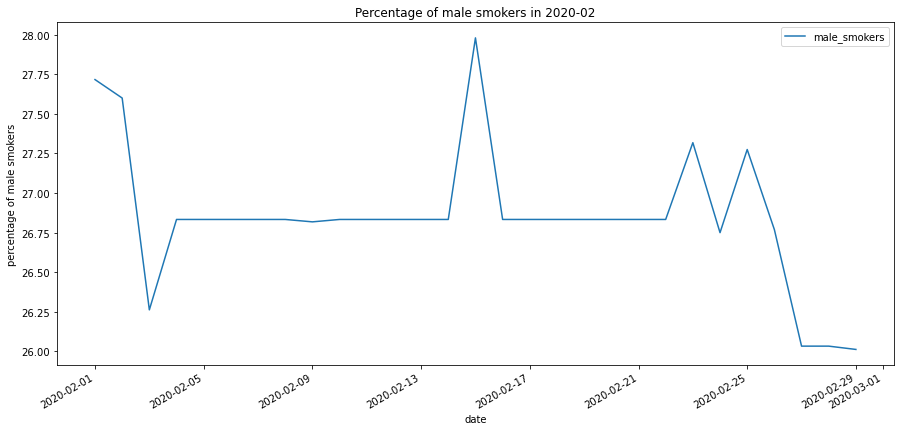

In [9]:
df2020 = df #make a seperate dataForm for the year 2020
df2020 = df2020[(df2020['date'] >= '2020-2-1') & (df2020['date'] < '2020-3-1')] # filter out correct year
df2020 = df2020.groupby('date', as_index=False, sort=False)['male_smokers'].mean() #clump all countries together by date and average out their smoker percentage
df2020.plot(x ='date', y='male_smokers', kind = 'line', figsize=(15,7), ylabel="percentage of male smokers", title="Percentage of male smokers in 2020-02") #plot a graph
plt.show() #show the graph

We've got a graph that shows how the percentage of smokers shifts during the second month of 2020 in the European countries with HDI of 0.9 or higher. It fluctuates by up to 4%.

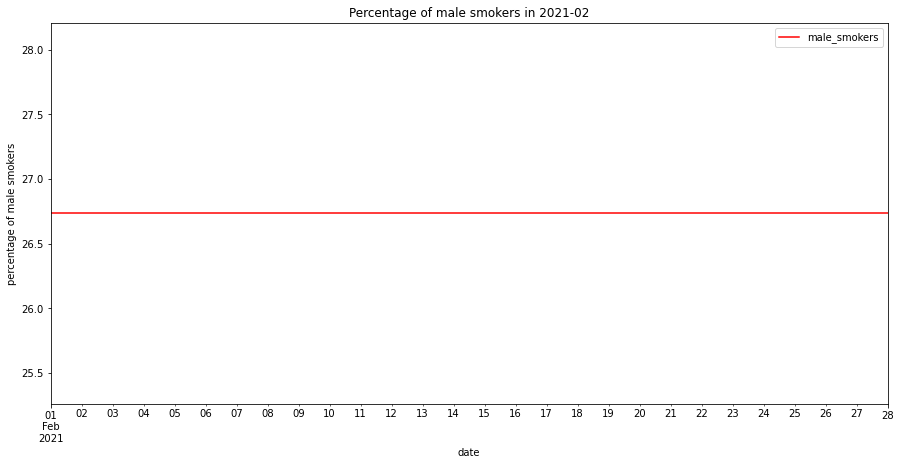

In [10]:
df2021 = df #make a seperate dataForm for the year 2021
df2021 = df2021[(df2021['date'] >= '2021-2-1') & (df2021['date'] < '2021-3-1')] # filter out correct year
df2021 = df2021.groupby('date', as_index=False, sort=False)['male_smokers'].mean() #clump all countries together by date and average out their smoker percentage
df2021.plot(x ='date', y='male_smokers', kind = 'line', color='red', figsize=(15,7), ylabel="percentage of male smokers", title="Percentage of male smokers in 2021-02") #plot a graph
plt.show() #show the graph

We've got a graph that shows how the percentage of smokers shifts during the second month of 2021 in the European countries with HDI of 0.9 or higher. It seems that either smokers are very consistent, or that there were no actual measures of smoking percentages and is simply left unchanged throughout the month for all of the European countries as the graph is completely flat.

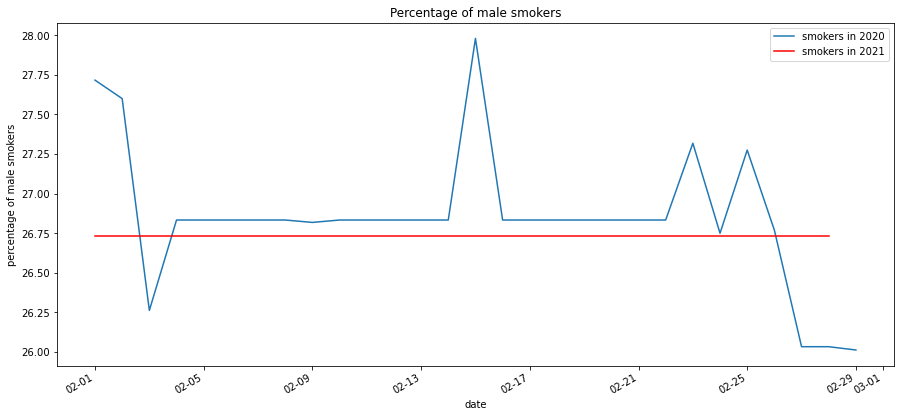

In [11]:
df2020['Date_2'] = df2020['date'].apply(lambda x: x.replace(year = 2000)) #replacing the year to 2000
df2021['Date_2'] = df2021['date'].apply(lambda x: x.replace(year = 2000)) #so that both lines could be shown on one graph
ax = plt.gca() #get current axis
df2020.plot(x ='Date_2', y='male_smokers', kind = 'line', figsize=(15,7), ylabel="percentage of male smokers", xlabel="date", title="Percentage of male smokers", ax=ax, label='smokers in 2020') #plot a graph for 2020
df2021.plot(x ='Date_2', y='male_smokers', kind = 'line', color='red', figsize=(15,7), ylabel="percentage of male smokers", xlabel="date", title="Percentage of male smokers", ax=ax, label='smokers in 2021') #plot a graph for 2021
date_form = DateFormatter("%m-%d") #remove the year from the date
ax.xaxis.set_major_formatter(date_form) #apply the date format
plt.show() #show the graph

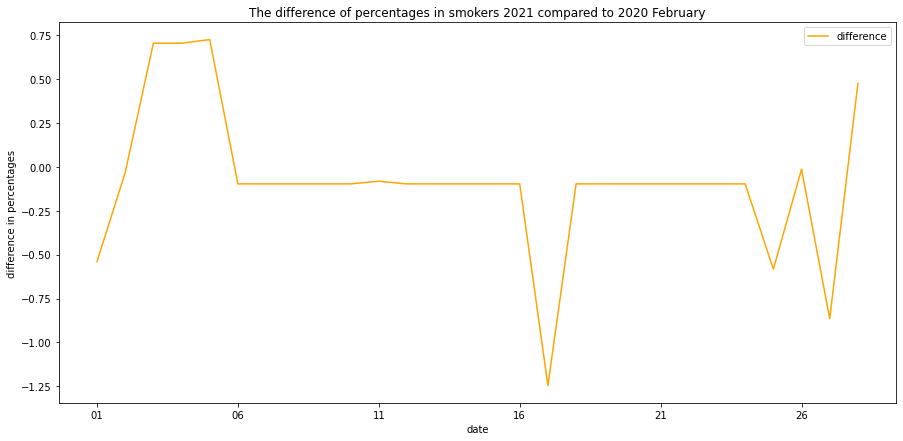

In [12]:
dfDifference = df2021['male_smokers'] - df2020['male_smokers'] #subtracting the percentages of smokers to see difference
ax = plt.gca() #get current axis
dfDifference.plot(x ='date', y='male_smokers', kind = 'line', color='orange', figsize=(15,7), ylabel="difference in percentages", xlabel="date", title="The difference of percentages in smokers 2021 compared to 2020 February", ax=ax, label='difference') #plot a graph for differences
date_form = DateFormatter("%d") #removing years
ax.xaxis.set_major_formatter(date_form) #applying format
plt.legend() #adding a legend
plt.show() #showing graph

This is the result of the first task. A difference in percentages of smokers in 2021 compared to 2020 on February. Unfortunately the graph for 2021 smokers was flat, so the final result isn't too interesting. Either way, if we are to assume that the data is correct, lockdowns and generally grim situation in the world has not had a significant impact on the habbits of smokers as the difference fluctuates no more than 2%.

[back to the top](#main)
<a id='Q2' name='Q2'></a>
## 2. How does diabetes prevalence correlate with GDP per capita? Compare Europe to North America.

In [13]:
#Firstly we create a smaller table of data that we will use.
#For Europe
dfEU = dfNew
rows = dfEU['continent'] =="Europe" #we select rows that have data about Europe
columns = ["continent"] + ["gdp_per_capita"] + ["diabetes_prevalence"] #we filter out relevant columns
dfEU = dfEU.loc[rows, columns]  # retrieve selected rows and columns
dfEU = dfEU.dropna() # remove any rows without values
dfEU #print out the data frame

,continent,gdp_per_capita,diabetes_prevalence
1199,Europe,11803.431,10.08
1200,Europe,11803.431,10.08
1201,Europe,11803.431,10.08
1202,Europe,11803.431,10.08
1203,Europe,11803.431,10.08
...,...,...,...
115967,Europe,39753.244,4.28
115968,Europe,39753.244,4.28
115969,Europe,39753.244,4.28
115970,Europe,39753.244,4.28


Relevant data for this task for Europe

In [14]:
#For NA
dfNA = dfNew
rows = dfNA['continent'] =="North America" #we select rows that have data about Europe
columns = ["continent"] + ["gdp_per_capita"] + ["diabetes_prevalence"] #we filter out relevant columns
dfNA = dfNA.loc[rows, columns]  # retrieve selected rows and columns
dfNA = dfNA.dropna() # remove any rows without values
dfNA #print out the data frame

,continent,gdp_per_capita,diabetes_prevalence
3781,North America,21490.943,13.17
3782,North America,21490.943,13.17
3783,North America,21490.943,13.17
3784,North America,21490.943,13.17
3785,North America,21490.943,13.17
...,...,...,...
116594,North America,54225.446,10.79
116595,North America,54225.446,10.79
116596,North America,54225.446,10.79
116597,North America,54225.446,10.79


Relevant data for this task for NA

In [15]:
pearsonr(dfEU['gdp_per_capita'], dfEU['diabetes_prevalence']) #using pearsonr get correlation and p-value

(-0.4848421103797472, 0.0)

_Here is our correlation between GDP per capita and diabetes prevalence for Europe.
The number onthe left is the correlation, while the number on the right is a p-value, which shows whether or not a correlation coefficient is statistically significant. The lower the p-value, the more significant it is._

Based on the results, correlation between these two statistics is quite significant negatively which tells us that as values in the GDP per capita increase, the values in the Diabetes prevalence tend to decrease.

Meaning that poorer countries in Europe tend to have more diabetic people.

In [16]:
pearsonr(dfNA['gdp_per_capita'], dfNA['diabetes_prevalence']) #using pearsonr get correlation and p-value

(0.08922275502977095, 2.077014318867439e-25)

_Here is our correlation between GDP per capita and diabetes prevalence for North America.
The number on the left is the correlation, while the number on the right is a p-value, which shows whether or not a correlation coefficient is statistically significant. The lower the p-value, the more significant it is._

Based on the results, correlation between these two statistics is very low which tells us that values are essentially unaffected by one another or are affected very slightly.

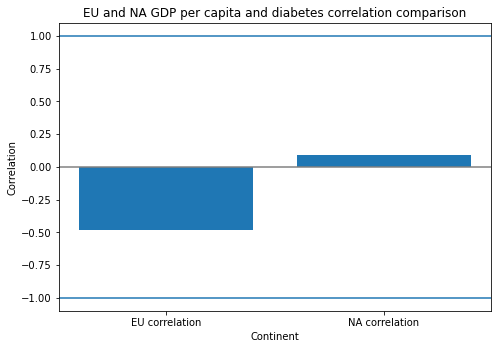

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
conts = ['EU correlation', 'NA correlation']
values = [dfEU['gdp_per_capita'].corr(dfEU['diabetes_prevalence']),dfNA['gdp_per_capita'].corr(dfNA['diabetes_prevalence'])]
ax.bar(conts,values)
plt.axhline(1)
plt.axhline(-1) #drawing lines for min/0/max
plt.axhline(0, color='gray')
plt.title('EU and NA GDP per capita and diabetes correlation comparison')
plt.xlabel('Continent')
plt.ylabel('Correlation')
plt.show()

Same result in a graph. Can more clearly see that EU's correlation is significant, but negative, while NA's correlation is weak, but positive.

[back to the top](#main)
<a id='Q3' name='Q3'></a>
## 3. Can we predict the tests per case in Europe for countries with population higher than 5 million based on total cases, total deaths and stringency index?

In [18]:
#Firstly we create a smaller table of data that we will use.
dfp = dfNew
rows = dfp['continent'] =="Europe" #we select rows that have data about Europe
columns = ["continent"] + ["date"] + ["population"] + ["tests_per_case"] + ["total_cases"] + ["total_deaths"] + ["stringency_index"] #we filter out relevant columns
dfp = dfp.loc[rows, columns]  # retrieve selected rows and columns
dfp = dfp[(dfp['population'] > 5000000)] #filter out relevant data
dfp = dfp.dropna() # remove any rows without values
dfp = dfp.groupby("date", as_index=True)[['tests_per_case', 'total_cases', 'total_deaths', 'stringency_index']].mean() #clump all countries together by date and average out statistics
dfp #print out the data frame

,tests_per_case,total_cases,total_deaths,stringency_index
date,,,,
2020-03-02,10.500000,2.036000e+03,52.000000,61.570000
2020-03-03,7.900000,2.502000e+03,79.000000,61.570000
2020-03-04,7.700000,3.089000e+03,107.000000,69.910000
2020-03-05,6.400000,3.858000e+03,148.000000,71.760000
2020-03-06,5.500000,4.636000e+03,197.000000,71.760000
...,...,...,...,...
2021-10-03,45.823529,1.517678e+06,31611.529412,40.548824
2021-10-04,56.175000,1.281612e+06,28105.583333,39.775000
2021-10-05,61.733333,1.357700e+06,30807.777778,39.350000


We've got the table we'll be working with for this task.

In [19]:
X = dfp[['total_cases', 'total_deaths', 'stringency_index']] #split table into variables
y = dfp['tests_per_case'] #split table into results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=133) #split it 20% test 80% train, with a "133" randomness seed

regr = linear_model.LinearRegression() #assign model
regr.fit(X_train, y_train) #train the model
score = regr.score(X_test.values, y_test.values) #get training score
score #show score

0.34756616686094854

We've split the table into training and tests, trained a LinearRegression model and got it's score of 0.347, which is decent, but most likely will only yield some basic tendencies.

In [20]:
y_prediction = pd.DataFrame((regr.predict(X_test)), columns=['prediction']) #make predictions with test variables
y_prediction.index=y_test.index #make indexes in the tables same
y_prediction #show got results

,prediction
date,
2020-07-20,112.953110
2020-11-15,36.812449
2020-06-22,118.253451
2020-05-31,77.438329
2020-03-31,-5.849489
...,...
2020-12-03,47.515036
2020-10-24,77.618488
2020-07-19,112.378071


This is a table of predictions we've got by using the test the model we've trained and test variables.

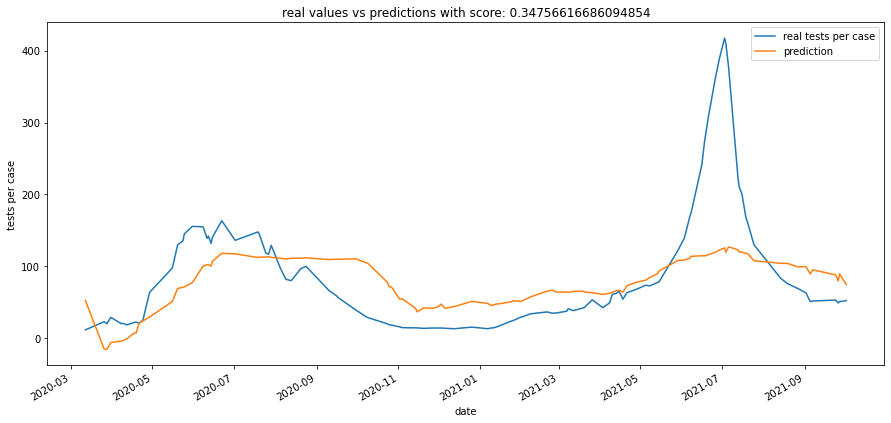

In [21]:
fig,ax = plt.subplots() #make a figure
y_test.plot(figsize=(15,7), title=f"real values vs predictions with score: {score}", label='real tests per case', ax=ax) #add real results
y_prediction.plot(figsize=(15,7), title=f"real values vs predictions with score: {score}", ylabel="tests per case", xlabel="date", ax=ax) #add predictions
plt.legend() #add a legend
plt.show() #show figure

And here is our final result graph. As already noticed from the model score, the multiple regression model was able to only predict tendencies, vaguely following the real graph. Bigger training data and picking variables that correlate with tests per case better could improve the predictions. Nonetheless, using what we have, the model was still able to predict somewhat resembling data.

[back to the top](#main)